In [5]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
load_dotenv()
API_KEY = os.getenv('API_KEY')

In [56]:
def get_listings():
    url = 'https://www.alphavantage.co/query?function=LISTING_STATUS&apikey=demo'
    data = pd.read_csv(url)
    return data

def get_ticker_info(ticker: str):
    url = f'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={ticker}&apikey={API_KEY}'
    request = requests.get(url)
    data = request.json()
    bestmatch = data['bestMatches'][0]
    if bestmatch:
        return bestmatch
    return None

def get_price(ticker: str):
    bestmatch = get_ticker_info(ticker)
    if bestmatch:
        symbol = bestmatch['1. symbol']
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=5min&apikey={API_KEY}'
        request = requests.get(url)
        data = request.json()
        return bestmatch, data 
    return None

In [52]:
companies = get_listings()

In [53]:
companies.head()

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
0,A,Agilent Technologies Inc,NYSE,Stock,1999-11-18,NaN,Active
1,AA,Alcoa Corp,NYSE,Stock,2016-10-18,NaN,Active
2,AAA,AXS First Priority CLO Bond ETF,NYSE ARCA,ETF,2020-09-09,NaN,Active
3,AAAU,Goldman Sachs Physical Gold ETF,BATS,ETF,2018-08-15,NaN,Active
4,AACG,ATA Creativity Global,NASDAQ,Stock,2008-01-29,NaN,Active


In [57]:
bestmatch, data = get_price('AAAU')

In [58]:
bestmatch

{'1. symbol': 'AAAU',
 '2. name': 'Goldman Sachs Physical Gold ETF',
 '3. type': 'ETF',
 '4. region': 'United States',
 '5. marketOpen': '09:30',
 '6. marketClose': '16:00',
 '7. timezone': 'UTC-04',
 '8. currency': 'USD',
 '9. matchScore': '1.0000'}

In [67]:
import matplotlib.pylab as plt 

In [74]:
df = pd.DataFrame(data['Time Series (5min)'])

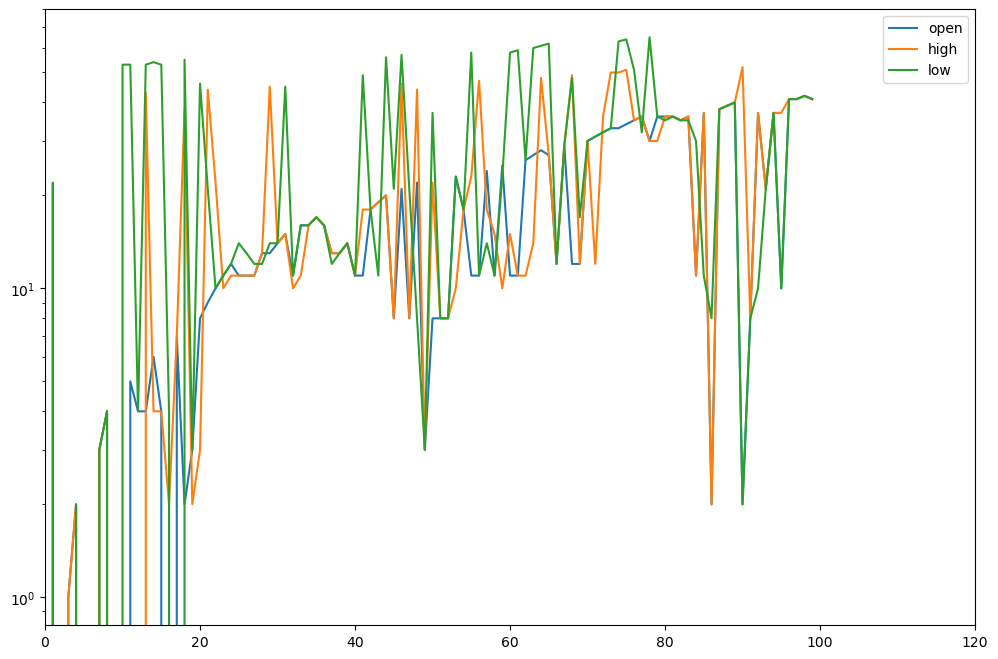

In [84]:
plt.figure(figsize = (12,8))
plt.plot(df.loc['1. open'].values, label = 'open')
plt.plot(df.loc['2. high'].values, label = 'high')
plt.plot(df.loc['3. low'].values, label = 'low')
plt.legend()
plt.yscale('log')
plt.xlim(0, 120)
plt.show()